In [58]:
import sys
sys.path.append("../src")


In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [60]:
from ddd import Tag

from loader import load_data

In [61]:
data = load_data()
#data

In [62]:
df = pd.DataFrame(data=[[tag.WochenID, tag.gesamtbewertung, tag.bolwertung, tag.Person, tag.wertung_distance,] for tag in data], columns=["WochenID", "Gesamtbewertung", "Bolwertung", "Person", "Distance",])

In [63]:
def plot_ddd_vs_dpd(data, axis_min=None, axis_max=40, major_ticks_step=5, minor_ticks_step=1):
    last_week = data["WochenID"].max()
    pre_last_week = last_week - 1

    if axis_min is None:
        axis_min = 10
    
    g = sns.scatterplot(data=df, x="Gesamtbewertung", y="Bolwertung", hue="WochenID", palette=sns.color_palette("husl", last_week))

    # title
    g.set_title("Wertung Kandidaten vs Bols")


    # axis
    g.set_xlim(axis_min, axis_max)
    g.set_ylim(axis_min, axis_max)
    g.set_aspect('equal', adjustable="box")

    # grid
    major_ticks = np.arange(axis_min, axis_max+1, major_ticks_step)
    minor_ticks = np.arange(axis_min, axis_max+1, minor_ticks_step)
    g.set_xticks(major_ticks)
    g.set_xticks(minor_ticks, minor=True)
    g.set_yticks(major_ticks)
    g.set_yticks(minor_ticks, minor=True)
    g.grid(which="minor", alpha=.3)
    g.grid(which="major", alpha=.5)

    # diagonal line
    linespace = np.linspace(axis_min, axis_max)
    sns.lineplot(x=linespace, y=linespace, color="grey", alpha=.5)


    # legend
    g.legend(title="Woche")


    # highlights
    for index, row in df.iterrows():

        # perfektes dinner
        if row["Gesamtbewertung"] >= 35 and row["Bolwertung"] >= 35:
            g.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7, color="g")

        # high difference in rating
        #elif row["Distance"] >= 10:
        #    ax.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7, color="red")

        # current week
        elif row["WochenID"] == last_week or row["WochenID"] == pre_last_week:
            g.annotate(row["Person"], (row["Gesamtbewertung"], row["Bolwertung"]), size=7)

    #g.grid(False)

    return g





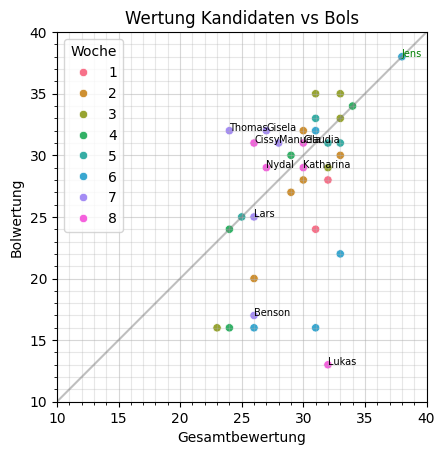

In [64]:
plot = plot_ddd_vs_dpd(df, axis_min=None)

#plot.get_figure().savefig("out.png", dpi=200)

# Woche

In [65]:
from dataclasses import dataclass

In [66]:
@dataclass
class Woche:
    tage: list[Tag]

    def __post_init__(self):
        # validate
        if len(set(tag.WochenID for tag in self.tage)) != 1:
            raise ValueError("Tage bilden keine Woche")

    @property
    def WochenID(self):
        return self.tage[0].WochenID

    @property
    def Ort(self):
        return self.tage[0].Ort

    @property
    def gesamtbewertung(self):
        return self._wertung(type="kandidaten")

    @property
    def bolwertung(self):
        return self._wertung(type="bols")


    def _wertung(self, type):
        if type == "kandidaten":
            wertungen = [tag.gesamtbewertung for tag in self.tage]
        elif type == "bols":
            wertungen = [tag.bolwertung for tag in self.tage]
        else:
            raise ValueError("Innvalid Type")

        wertungen = list(filter(None, wertungen))

        if len(wertungen) == 0:
            return None

        punkte = (sum(wertungen) / len(wertungen)) * 5
        punkte = round(punkte)

        return punkte

    def __str__(self):
        return f"Woche {self.WochenID} aus {self.Ort}. K: {self.gesamtbewertung}, B: {self.bolwertung}"


    

In [67]:
from itertools import groupby

In [68]:
groups = []
for k, g in groupby(data, key=lambda x: x.WochenID):
    groups.append(Woche(list(g)))      # Store group iterator as a list
    #uniquekeys.append(k)

In [69]:
wochen = [Woche(list(g)) for k, g in groupby(data, key=lambda x: x. WochenID)]

In [70]:
wochen

[Woche(tage=[Tag(WochenID=1, FolgenID=1460, Datum='16.11.2011', Ort='Wilhelmshaven', K1=8, K2=7, K3=None, K4=7, K5=8, Summe=30, Mikkel=None, Andi=None, Chat=None, Person='Manu', Bemerkung='Chat: nur eine einzelne Wertung, 5, daher ungültig', YTLink=None), Tag(WochenID=1, FolgenID=1461, Datum='17.11.2011', Ort='Wilhelmshaven', K1=7, K2=8, K3=8, K4=None, K5=8, Summe=31, Mikkel=6, Andi=6, Chat=6, Person='Jonas', Bemerkung=None, YTLink=None), Tag(WochenID=1, FolgenID=1462, Datum='18.11.2011', Ort='Wilhelmshaven', K1=9, K2=9, K3=7, K4=7, K5=None, Summe=34, Mikkel=7, Andi=7, Chat=7, Person='Anja', Bemerkung=None, YTLink=None)]),
 Woche(tage=[Tag(WochenID=2, FolgenID=205, Datum='18.12.2006', Ort=None, K1=None, K2=9, K3=8, K4=7, K5=9, Summe=33, Mikkel=8, Andi=7, Chat=None, Person='Marco', Bemerkung='Chat: keine Wertung abgegeben', YTLink=None), Tag(WochenID=2, FolgenID=206, Datum='19.12.2006', Ort=None, K1=7, K2=None, K3=7, K4=9, K5=7, Summe=30, Mikkel=7, Andi=7, Chat=7, Person='Jasmin', Bemer

In [71]:
for woche in wochen:
    print(woche)

Woche 1 aus Wilhelmshaven. K: 155, B: 130
Woche 2 aus None. K: 148, B: 137
Woche 3 aus Bergisches Land. K: 152, B: 148
Woche 4 aus Hamburg. K: 142, B: 136
Woche 5 aus Nürnberg. K: 151, B: 150
Woche 6 aus Ruhrgebiet. K: 159, B: 124
Woche 7 aus Ruhrgebiet. K: 131, B: 137
Woche 8 aus Berlin. K: 145, B: 133


In [72]:
df = pd.DataFrame(data=[[woche.WochenID, woche.gesamtbewertung, woche.bolwertung, woche.Ort] for woche in wochen ], columns=["WochenID", "Gesamtbewertung", "Bolwertung", "Person",])

In [73]:
df

,WochenID,Gesamtbewertung,Bolwertung,Person
0,1,155,130,Wilhelmshaven
1,2,148,137,None
2,3,152,148,Bergisches Land
3,4,142,136,Hamburg
4,5,151,150,Nürnberg
5,6,159,124,Ruhrgebiet
6,7,131,137,Ruhrgebiet
7,8,145,133,Berlin


<Axes: title={'center': 'Wertung Kandidaten vs Bols'}, xlabel='Gesamtbewertung', ylabel='Bolwertung'>

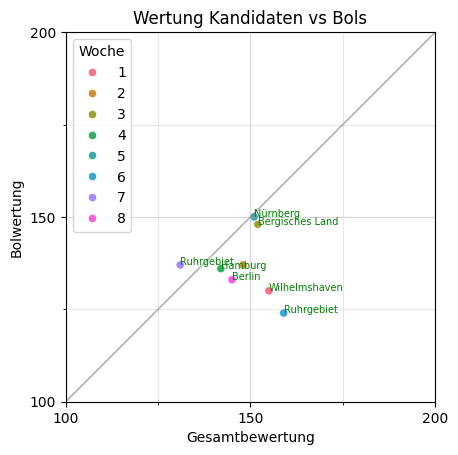

In [74]:
plot_ddd_vs_dpd(df, axis_min=100, axis_max=200, major_ticks_step=50, minor_ticks_step=25)